# Table of Contents
 <p><div class="lev1 toc-item"><a href="#ノートブック内にGUIを置く:-ipywidgets" data-toc-modified-id="ノートブック内にGUIを置く:-ipywidgets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ノートブック内にGUIを置く: ipywidgets</a></div><div class="lev2 toc-item"><a href="#ロジスティックマップの描画" data-toc-modified-id="ロジスティックマップの描画-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ロジスティックマップの描画</a></div><div class="lev2 toc-item"><a href="#interactの利用" data-toc-modified-id="interactの利用-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>interactの利用</a></div><div class="lev2 toc-item"><a href="#Lorenz方程式に適用した例" data-toc-modified-id="Lorenz方程式に適用した例-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Lorenz方程式に適用した例</a></div><div class="lev3 toc-item"><a href="#ライブラリのインポート" data-toc-modified-id="ライブラリのインポート-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>ライブラリのインポート</a></div><div class="lev3 toc-item"><a href="#描画部分を関数に" data-toc-modified-id="描画部分を関数に-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>描画部分を関数に</a></div><div class="lev3 toc-item"><a href="#interact,-interactiveの利用例" data-toc-modified-id="interact,-interactiveの利用例-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>interact, interactiveの利用例</a></div><div class="lev2 toc-item"><a href="#interact_manualの利用" data-toc-modified-id="interact_manualの利用-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>interact_manualの利用</a></div><div class="lev2 toc-item"><a href="#ボタンクリックによるスタート（Envent-Handler)" data-toc-modified-id="ボタンクリックによるスタート（Envent-Handler)-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>ボタンクリックによるスタート（Envent Handler)</a></div><div class="lev2 toc-item"><a href="#デコレータとして用いる方法" data-toc-modified-id="デコレータとして用いる方法-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>デコレータとして用いる方法</a></div><div class="lev1 toc-item"><a href="#一般的なGUI" data-toc-modified-id="一般的なGUI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>一般的なGUI</a></div>

# ノートブック内にGUIを置く: ipywidgets

ノートブック内にGUI部品（ウィジェット）を置く機能がいくつか開発されている。

簡易な利用法のひとつとして interact を紹介し、そのあとEvent Handlerの利用例を示す。

## ロジスティックマップの描画

マップの定義と描画部分を関数として作成
マップのパラメータ$a$と繰り返し回数を引数として与える。

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def logisticFunc(xin,a): # definition of the Logistic map
    return a*xin*(1-xin)

def plotLogisticMap(a=3.2, iteration=20):
    '''
    Plotting package of 1-d maps
    args: parameter of map, number of iteration
    '''
    xn = 0.1   # initial value of the variable
    
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1) # Alternatively you can simply use plt.plot()
    # draw y=x and f(x)
    x = np.arange(0,1.0,0.01)
    axes.plot(x, a*x*(1-x), 'r')
    axes.plot(x, x, 'k')
    axes.set_xlabel("$x_n$")
    axes.set_ylabel("$x_{n+1}$")
    axes.set_title("a=" + str(a))
    # show map iterations
    xnext = logisticFunc(xn,a) 
    axes.plot([xn,xn],[0,xnext])
    for i in range(iteration):
        axes.plot([xn,xnext],[xnext,xnext],"b")
        xn = xnext
        xnext = logisticFunc(xn,a)
        axes.plot([xn,xn], [xn,xnext],"b")

関数にパラメータ$a$と繰り返し回数を引数として与えれば描画される

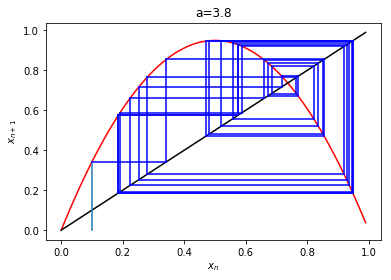

In [9]:
plotLogisticMap(3.8, 30)

## interactの利用

- ipywidgetsのinteract関数をインポート
- interract関数の第1引数に実行する関数名、２つめ以降に実行する関数の引数の最大値、最小値、規定値を与える。


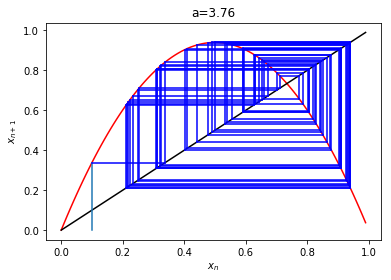

In [10]:
from ipywidgets import interact, fixed
interact(plotLogisticMap, a=(0.0,4.0,0.02), iteration=(10,100,5))

## Lorenz方程式に適用した例

$$
\begin{eqnarray}
\frac{dx}{dt} &= \sigma (y-x) \\
\frac{dy}{dt} &= -xz + rx - y\\
\frac{dz}{dt} &=xy -bz
\end{eqnarray}
$$

### ライブラリのインポート
まずは、必要なライブラリをインポート

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### 描画部分を関数に

パラメータを引数にする。

(注）interactiveの利用では、各widgetの状態が変化するごとに、関数が実行される。下のcalc_and_plotでは、引数でrunがTrueになったときのみ実行するように設定した。


In [2]:

def lorentz_deriv(x, t0, sigma=10., beta=8./3., rho=28.0):
    """Compute the time-derivative of a Lorenz system."""
    return (sigma * (x[1] - x[0]), x[0] * (rho - x[2]) - x[1], x[0] * x[1] - beta * x[2])

def calc_and_plot(sigma, beta, rho, max_time=20, run=True) :
    
    if not run:
        return "not run"
    
    x0 = [1., 1., 1.]  # starting vector
    t = np.linspace(0, max_time, max_time*100) # time step is fixed
    x_t = integrate.odeint(lorentz_deriv, x0, t, args=(sigma, beta, rho))
    fig =plt.figure(figsize=(12,5))

    ax1 =fig.add_subplot(1,2,1)   # 1 in (1 row, 2 columns)
    ax1.plot(t,x_t[:,0], label = "$x$")
    ax1.plot(t,x_t[:,1], label = "$y$")
    ax1.plot(t,x_t[:,2], label = "$z$")
    ax1.legend(loc=2)
    
    ax2= fig.add_subplot(1,2,2,projection='3d')  # Axes3D is required
    ax2.plot(x_t[:,0], x_t[:,1], x_t[:,2])
    plt.title('$\sigma =' + str(sigma) + '$, $\\beta =' + str(beta) + '$, $\\rho =' + str(rho) + '$')
    plt.show()
    # return fig


### interact, interactiveの利用例

スライダによるパラメータの設定だけだと、そのどれかが変更されるごとに計算するので、コンピュータの能力によっては極端に反応が悪くなる。
そのため、runのチェックボックスにチェックが入っているときのみ計算を実行するようにした。
下の例のようにwidget名を省略するとスライダになる。詳しくは、http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html

interactは即時的に実行される。
interactiveは、たとえば w = interactive(引数列)のようにオブジェクトを作って、dipsplay(w)のようにそれを表示する。この程度のものではどちらでもよいと思う。


In [3]:
import numpy as np
from ipywidgets import interact, interactive, Checkbox
from IPython.display import clear_output, display, HTML

interact(calc_and_plot, sigma=(0.0,20.0), beta=(0, 8.0), rho=(0.0, 40.0),max_time=(10,50,1), run=Checkbox(value=False))
#display(w)

'not run'

## interact_manualの利用

A simpler method is to use "interact_manual" as mensioned Sec.1.
If using "interact_manual", chackbox (the last argument of calc_and_plot) is not necessary.

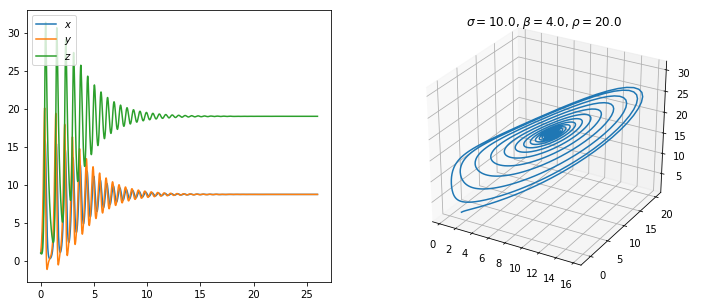

In [4]:
from ipywidgets import interact_manual
interact_manual(calc_and_plot, sigma=(0.0,20.0), beta=(0, 8.0), rho=(0.0, 40.0),max_time=(10,50,1))

## ボタンクリックによるスタート（Envent Handler)

interact_manualを使えば、特に必要はないかもしえないが、スタートボタンを押したときに計算を始めるようにするための一つの工夫を紹介する。

(下のコードのなかのスライダなどのwidgetの引数指定は、役立つノウハウではあると思う。interact_manualを使った上の例に組み込んでみてもらいたい。)

ボタンにイベントハンドラ(on_click)をつけて、クリック時に計算を開始するようにしてみる。
計算に時間がかかるときはこの方法が便利
（Javaなどのウィジェットにリスナーを定義するような感じ。）

（以前に描いたプロットが消去できない。計算、描画部分をクラスとして記述しておいて、描画部分のインスタンスを保持しながら実行すればよいかもしれないが試していない。）

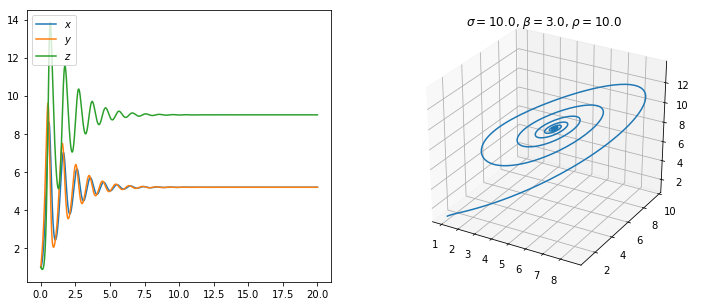

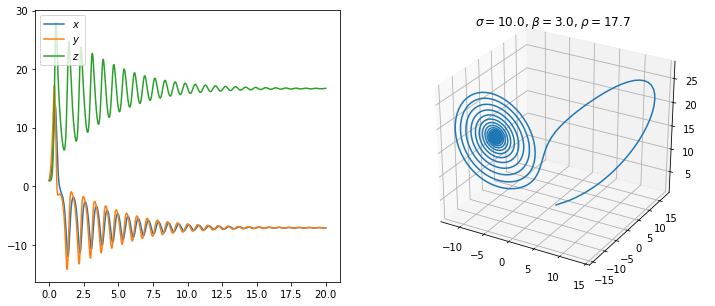

In [13]:
import ipywidgets as widgets
from IPython.display import display
from ipykernel.pylab.backend_inline import flush_figures

present_fig = None

set_sigma = widgets.FloatSlider(value= 10, min=0, max=20.0, step=0.1,
                                 description="sigma", readout=True,
                                 readout_format='i', layout=widgets.Layout(width='50%'))
set_beta = widgets.FloatSlider(value= 3.0, min=0, max=8.0, step=0.1,
                                 description='beta', readout=True,
                                 readout_format='i', layout=widgets.Layout(width='50%'))
set_rho = widgets.FloatSlider(value= 10.0, min=0, max=40.0, step=0.1,
                                 description='rho', readout=True,
                                 readout_format='i', layout=widgets.Layout(width='50%'))
set_max_time = widgets.FloatSlider(value= 20.0, min=10, max=50.0, step=1.0,
                                 description='max_time', readout=True,
                                 readout_format='i', layout=widgets.Layout(width='50%'))
startBtn =widgets.Button(description='Run', disabled=False,icon='check')

def run_by_button(dummy):
    # global present_fig
    #if present_fig is not None: # This doesn't work (?)
    #    present_fig.clf()
    flush_figures() # doesn't work
    calc_and_plot(set_sigma.value, set_beta.value, set_rho.value, set_max_time.value)

startBtn.on_click(run_by_button)

display(set_sigma)
display(set_beta)
display(set_rho)
display(set_max_time)
display(startBtn)


## デコレータとして用いる方法

次のように、関数を呼ぶときの引数をスライダの現在値を渡すデコレータをつける方法もある。
（＠で始まるのは、デコレータと呼ばれ、その下で定義される関数の上に被せるものという意味。）

引用元： http://qiita.com/tanemaki/items/e965cd9c25acbeed860c

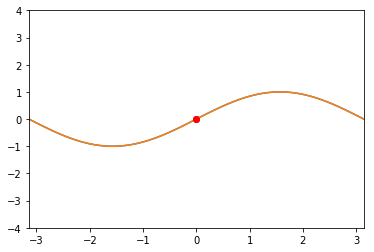

In [8]:
%matplotlib inline
from __future__ import print_function
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
import numpy as np
import matplotlib.pyplot as plt

@interact(amp=(0.1, 4.0, 0.1), omega=(0.1, 4.0, 0.1), phase=(-np.pi, np.pi, 0.1), 
          fn = {'sin': np.sin, 'cos': np.cos, 'tan': np.tan})
def h(amp=1.0, omega=1.0, phase=0.0, fn=np.sin):
    domain=[-np.pi, np.pi]
    x = np.linspace(domain[0], domain[1], 100)
    y  = amp * fn(omega * x + phase)
    plt.plot(x, y)
    plt.plot(-phase/omega, 0, 'or')
    plt.xlim(domain)
    plt.ylim([-4, 4])

h()
plt.show()

# 一般的なGUI

本格的なGUIを作成するには、ノートブックとは独立に独自のウィンドウ上に作成するライブラリを利用する.


- Tkinter もっとも伝統的なGUI
 - http://docs.python.jp/2/library/tk.html
 - 次の節で例を示す
 - ライブラリ名は、python2では"Tkinter"、python3では"tkinter"であることに注意してほしい。
- wxPython
- PyQt
- PyGTK
詳しくは、http://docs.python.jp/2/library/othergui.html


次は、複数の非線形振動子が結合した系の振る舞いを調べる。
[該当ページへ](coupledNonlinearOscillations.html)